In [1]:
#importing libraries according to current needs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import r2_score,mean_squared_error
## ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
# and concat the data so that we can split it later accordingly
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
data=pd.concat([train_data,test_data])

In [3]:
data.head()

,Unnamed: 0,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,SellingPrice,Age
0,1,46986,Diesel,3,0,90,1,2000,1165,13500,23
1,7,94612,Diesel,3,0,90,1,2000,1245,16900,27
2,9,19700,Petrol,3,0,192,0,1800,1185,21500,27
3,12,43610,Petrol,3,0,192,0,1800,1185,19950,22
4,15,34131,Petrol,3,0,192,1,1800,1185,22500,32


In [4]:
data.info() #checking the data types and null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 477
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1436 non-null   int64 
 1   Kilometeres   1436 non-null   int64 
 2   Fuel_Type     1436 non-null   object
 3   Doors         1436 non-null   int64 
 4   Automatic     1436 non-null   int64 
 5   HorsePower    1436 non-null   int64 
 6   MetallicCol   1436 non-null   int64 
 7   CC            1436 non-null   int64 
 8   Wt            1436 non-null   int64 
 9   SellingPrice  1436 non-null   int64 
 10  Age           1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 134.6+ KB


In [5]:
data.describe()

,Unnamed: 0,Kilometeres,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,SellingPrice,Age
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000
mean,718.500000,68533.259749,4.033426,0.055710,101.502089,0.674791,1566.827994,1072.45961,10730.824513,55.947075
std,414.681806,37506.448872,0.952677,0.229441,14.981080,0.468616,187.182436,52.64112,3626.964585,18.599988
min,1.000000,1.000000,2.000000,0.000000,69.000000,0.000000,1300.000000,1000.00000,4350.000000,1.000000
25%,359.750000,43000.000000,3.000000,0.000000,90.000000,0.000000,1400.000000,1040.00000,8450.000000,44.000000
50%,718.500000,63389.500000,4.000000,0.000000,110.000000,1.000000,1600.000000,1070.00000,9900.000000,61.000000
75%,1077.250000,87020.750000,5.000000,0.000000,110.000000,1.000000,1600.000000,1085.00000,11950.000000,70.000000
max,1436.000000,243000.000000,5.000000,1.000000,192.000000,1.000000,2000.000000,1615.00000,32500.000000,80.000000


In [6]:
data.drop(['Unnamed: 0'],axis=1,inplace=True) #droping unnessery data

In [7]:
x=data.drop(['SellingPrice'],axis=1) # seting features or independent variable
y=data["SellingPrice"]# seting target or dependent variable

In [8]:
#replacing chachter data with dummy variable
x=pd.get_dummies(x,columns=['Fuel_Type'])

In [9]:
x.head()

,Kilometeres,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,46986,3,0,90,1,2000,1165,23,0,1,0
1,94612,3,0,90,1,2000,1245,27,0,1,0
2,19700,3,0,192,0,1800,1185,27,0,0,1
3,43610,3,0,192,0,1800,1185,22,0,0,1
4,34131,3,0,192,1,1800,1185,32,0,0,1


In [10]:
#spling the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
#scaling the independent variable
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [12]:
x_train= pd.DataFrame(x_train,columns=x.columns) #converting array to dataframe

In [13]:
x_train.head()

,Kilometeres,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-0.788583,1.024367,-0.244987,0.572416,0.708955,0.162506,0.038140,0.324544,-0.111111,-0.357353,0.378717
1,-0.332661,-1.075585,4.081855,0.374702,0.708955,0.162506,0.131416,0.324544,-0.111111,-0.357353,0.378717
2,2.125676,1.024367,-0.244987,-0.745673,0.708955,2.284579,1.157463,0.594527,-0.111111,2.798351,-2.640497
3,3.235744,-1.075585,-0.244987,-1.931953,0.708955,2.284579,0.784355,0.162554,-0.111111,2.798351,-2.640497
4,-0.791233,-1.075585,-0.244987,-0.284342,0.708955,-0.898531,-0.894630,-0.485405,-0.111111,-0.357353,0.378717


In [14]:
x_train.corr() #correlations 

,Kilometeres,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Kilometeres,1.000000,-0.029430,-0.089827,-0.344535,-0.058112,0.313014,-0.020889,0.499292,0.155670,0.419115,-0.452573
Doors,-0.029430,1.000000,-0.033976,0.076202,0.066618,0.107402,0.290936,-0.155749,0.013821,0.025483,-0.028961
Automatic,-0.089827,-0.033976,1.000000,0.023985,-0.026025,-0.062684,0.071922,0.023949,-0.027221,-0.087547,0.092781
HorsePower,-0.344535,0.076202,0.023985,1.000000,0.048397,0.018325,0.069237,-0.139593,0.063602,-0.555605,0.510497
MetallicCol,-0.058112,0.066618,-0.026025,0.048397,1.000000,0.042357,0.054933,-0.097698,0.028309,-0.003004,-0.006506
CC,0.313014,0.107402,-0.062684,0.018325,0.042357,1.000000,0.634623,-0.122799,0.017972,0.767767,-0.740514
Wt,-0.020889,0.290936,0.071922,0.069237,0.054933,0.634623,1.000000,-0.457662,0.048063,0.551159,-0.543248
Age,0.499292,-0.155749,0.023949,-0.139593,-0.097698,-0.122799,-0.457662,1.000000,0.011205,-0.094942,0.087122
Fuel_Type_CNG,0.155670,0.013821,-0.027221,0.063602,0.028309,0.017972,0.048063,0.011205,1.000000,-0.039706,-0.293389
Fuel_Type_Diesel,0.419115,0.025483,-0.087547,-0.555605,-0.003004,0.767767,0.551159,-0.094942,-0.039706,1.000000,-0.943590


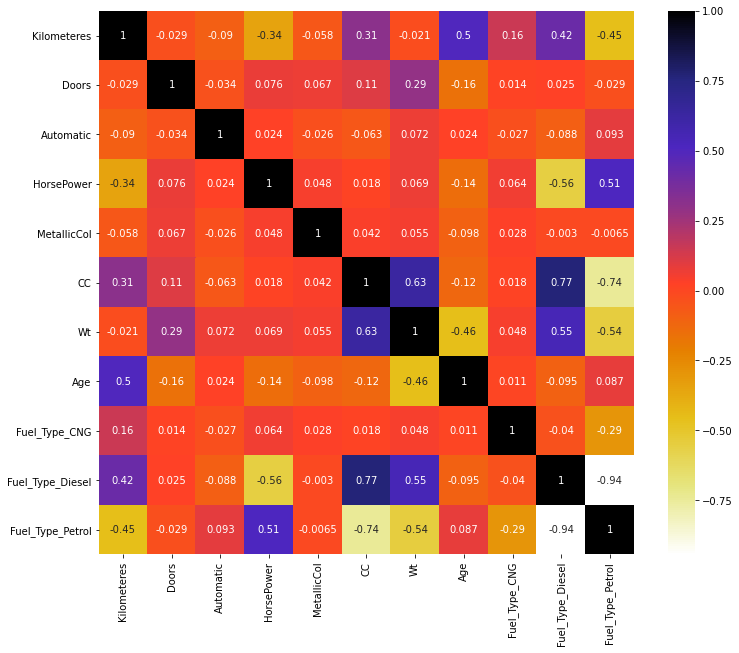

In [15]:
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
#makeing a fun which will check if there is any correlation more thn 85%
def correlation(data,threshold):
    columns=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                column_name=corr_matrix.columns[j]
                columns.add(column_name)
    return columns

In [17]:
corr_features=correlation(x_train,0.85) 
corr_features

{'Fuel_Type_Diesel'}

In [18]:
#before training and testing model stand scaling test data
x_test=sc.transform(x_test)
x_test= pd.DataFrame(x_test,columns=x_train.columns)

In [19]:
#now we can drop that feature named(fuel_type_diesel)
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [20]:
# training model with traing dataset

#multilinear
mul_reg=LinearRegression().fit(x_train,y_train)
#polynomial regression
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
poly_reg=LinearRegression().fit(x_poly,y_train)
#decisionTree
dec_tree=DecisionTreeRegressor().fit(x_train,y_train)
#randomforestRegressor
random_for=RandomForestRegressor(n_estimators=100).fit(x_train,y_train)


In [21]:
#predicted values
#linear model prediction
linear_pred=mul_reg.predict(x_test)
#polynomial model prediction
poly_test_x=poly.transform(x_test)
poly_pred=poly_reg.predict(poly_test_x)
#decision tree model prediction
decision_pred=dec_tree.predict(x_test)
#random forest model prediction
random_pred=random_for.predict(x_test)

In [22]:
all_pred=[linear_pred,poly_pred,decision_pred,random_pred]
models=["linear_regresstion",'polynomial_regresstion','decision_tree','random_forest']
show={}
for i in range(len(models)):
    show[models[i]]=[r2_score(y_test,all_pred[i]),mean_squared_error(y_test,all_pred[i])]
results=pd.DataFrame(show.items(),columns=['MODELS','r2score,mean_squre_error'])
results

,MODELS,"r2score,mean_squre_error"
0,linear_regresstion,"[0.8812624468918344, 1490215.8728489317]"
1,polynomial_regresstion,"[-8.945166084847907e+16, 1.122663229615902e+24]"
2,decision_tree,"[0.845708747092154, 1936432.6458333333]"
3,random_forest,"[0.906689623362211, 1171092.0490375385]"


In [23]:
#as we can see here random forest have the maximum r2score and minimum mean squre error

In [24]:
# we can try to do hyper perameter tuning if we can get better results

In [25]:
txt="n_estimators is {i:.0f}"
resul={}
for i in range(50,550,50):
    model=RandomForestRegressor(n_estimators=i,random_state=0)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    resul[txt.format(i=i)]=r2_score(y_test,y_pred)
    
results=pd.DataFrame(resul.items(),columns=['n_estimators','r2score'])
results
    


,n_estimators,r2score
0,n_estimators is 50,0.903689
1,n_estimators is 100,0.904977
2,n_estimators is 150,0.905317
3,n_estimators is 200,0.904555
4,n_estimators is 250,0.904200
5,n_estimators is 300,0.904459
6,n_estimators is 350,0.904963
7,n_estimators is 400,0.905096
8,n_estimators is 450,0.904878
9,n_estimators is 500,0.904625


In [26]:
#so the best accurcy we can get is using random forest regressor model and value of n_estimators id 150